# Scipy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize
from scipy import signal
from scipy import fftpack

### Interpolate module

Attention de ne pas rater la réalité(si entre chaque point, il y a une oscilliation, on ne le remarquera pas, bien choisir son type d'interpolation)

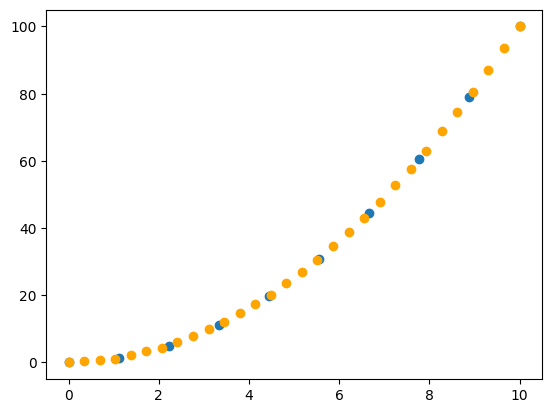

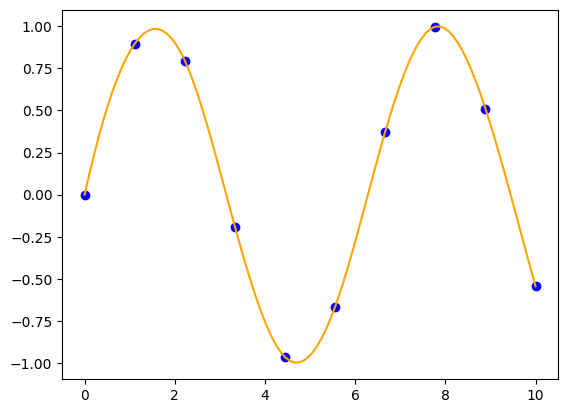

In [2]:
x = np.linspace(0, 10, 10)
y = x**2

plt.figure()
plt.scatter(x, y)

#Retourne une autre fonction f(x) qui est la fonction d'interpollation interp1d(x, y, kind="interpolation type")
f = interp1d(x, y, kind='linear')#type de base

#Calcul des nouveaux x(création des nouveaux points)
new_x = np.linspace(0, 10, 30)
#Calcul des bons y avec la fonction d'interpolation
new_y = f(new_x)
#Affichage des 30 nouveaux points
plt.scatter(new_x, new_y, color="orange")
plt.show()

a = np.linspace(0, 10, 10)
b = np.sin(a)
plt.figure()
plt.scatter(a, b, color="blue")

f = interp1d(a, b, kind="cubic")
new_a = np.linspace(0, 10, 100)
new_b = f(new_a)
plt.plot(new_a, new_b, color="orange")

### Optimize module

#### Curve function

Si possible, utiliser scikit learn

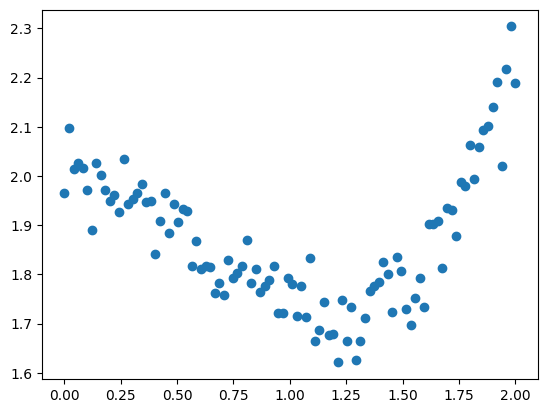

In [3]:
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5*x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

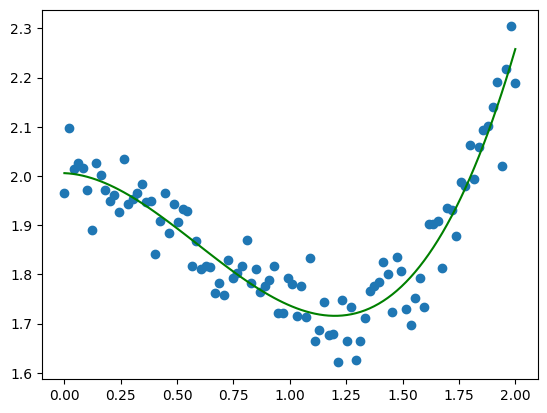

In [ ]:
#modèle de résolutions ax² + bx² + cx + d
def f(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

#Renvoie un tableau en utilisant le modèle et le données x, y(tab1: params de modèle, tab2: covariances(matric de covariance du modèle))
#Cette ligne trouve la courbe correcte
optimize.curve_fit(f, x, y)
params, param_cov = optimize.curve_fit(f, x, y)
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), color="green")

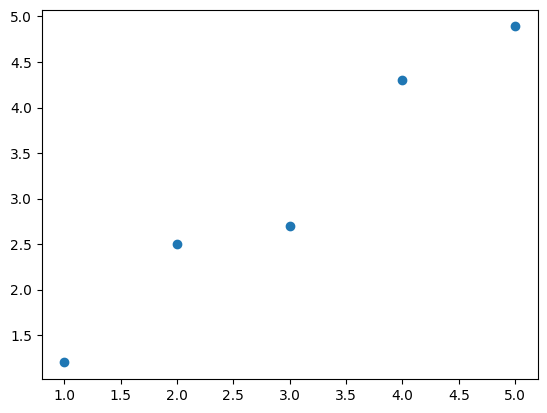

In [ ]:
#Exercice
table = np.array([1.2, 2.5, 2.7, 4.3, 4.89])
x = np.array([1, 2, 3, 4, 5])
plt.scatter(x, table)



### Minimize
permet de minimiser une fonction

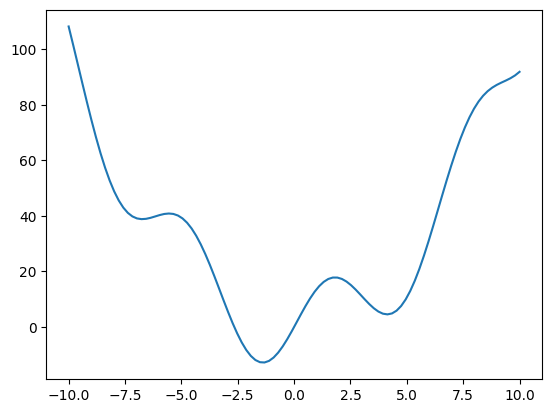

In [17]:
def f(x):
    return x**2 + 15*np.sin(x)
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

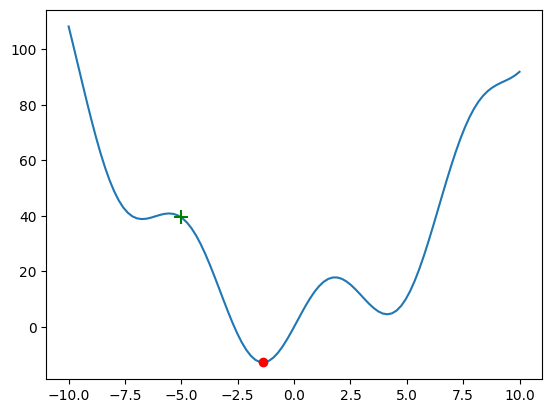

In [42]:
#Utilise la gradient descent pour trouver le minimum
#param(fonction, point de départ du gradient descent en x)
#Trouve le minimum local
optimize.minimize(f, x0=-8)
#pour trouver le minimum absolu on peut changer de point de départ
# .x pour obtenir simplement le x
xzero = -5
result = optimize.minimize(f, x0=xzero).x
plt.plot(x, f(x), zorder=1)
plt.scatter(result, f(result), color="red")
plt.scatter(xzero, f(xzero), color="green", marker="+", s=100)

Utilisation avec un contour plot

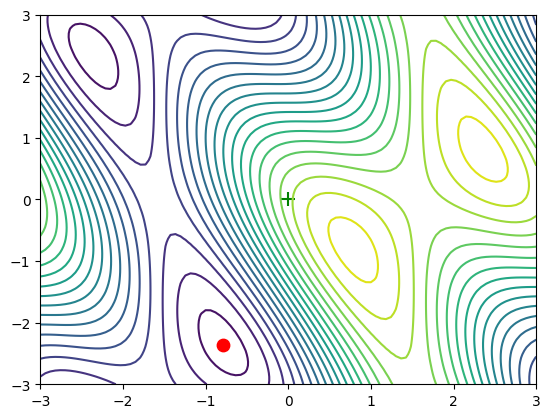

In [64]:
def f(x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)

plt.contour(x, y, f(np.array([x, y])), 20)

x0 = np.zeros((2))
plt.scatter(x0[0], x0[1], marker="+", color="green", s=100)

result = optimize.minimize(f, x0=x0).x
plt.scatter(result[0], result[1], color="red", s=80)

### Signal fft: traitement de signal

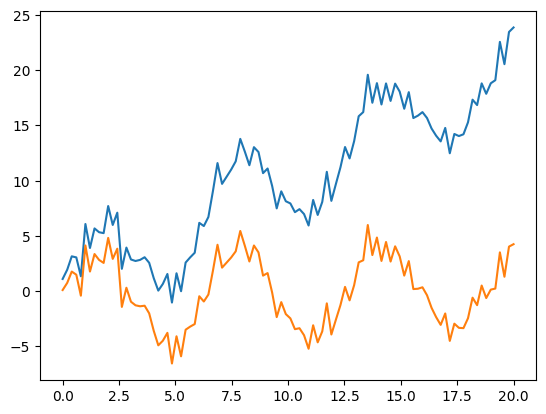

In [72]:
x = np.linspace(0, 20, 100)
y = x+4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x, y)

new_y = signal.detrend(y)
plt.plot(x, new_y)

Transformation de fourier

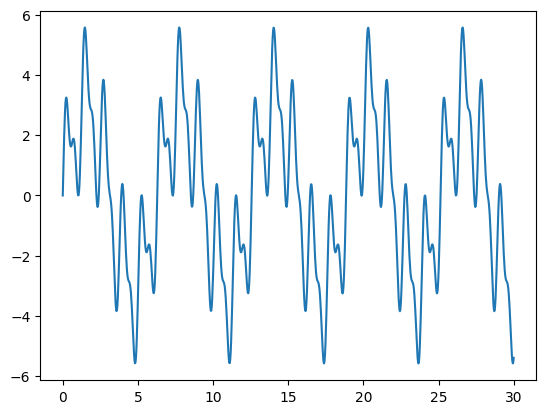

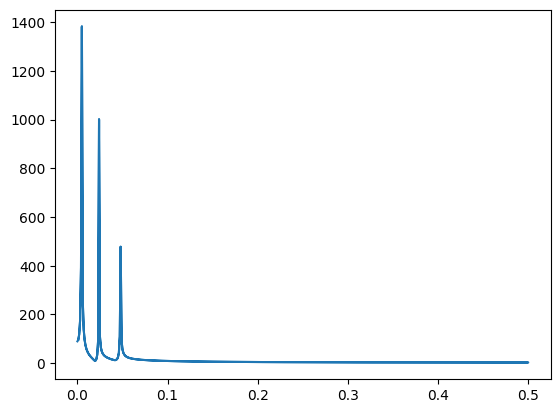

In [88]:
x = np.linspace(0, 30, 1000)
y = 3 * np.sin(x) + 2 * np.sin(5 * x) + np.sin(10 * x)

plt.plot(x, y)
plt.show()
# Tracer le spectre de fréquence
#power = fftpack.fft(signal)
#frq = fftpack.fftfreq(signal.size)
fourier = fftpack.fft(y)
#power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), np.abs(fourier))

Filtrer un signal(supprimer un bruit)

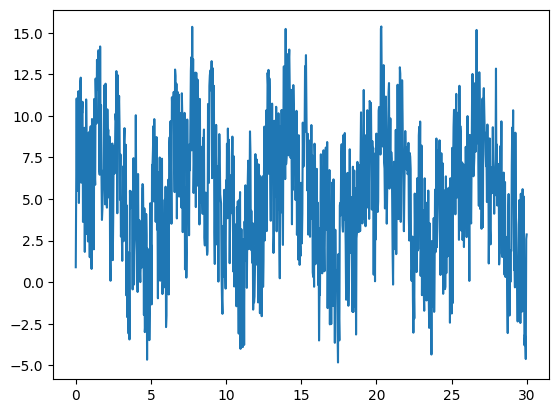

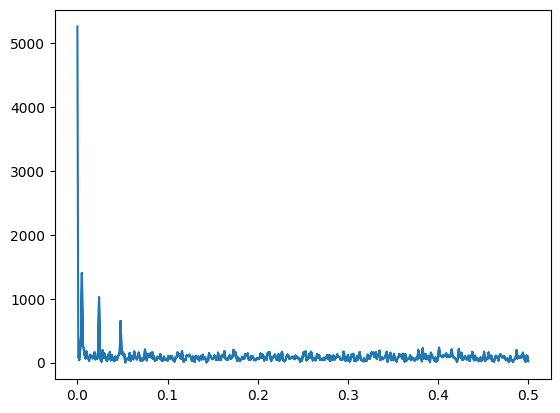

c:\Users\32472\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\32472\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


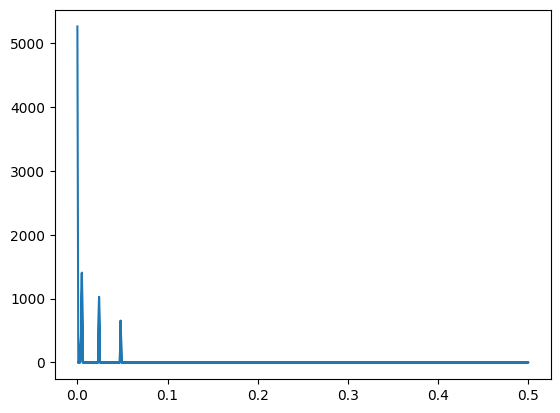

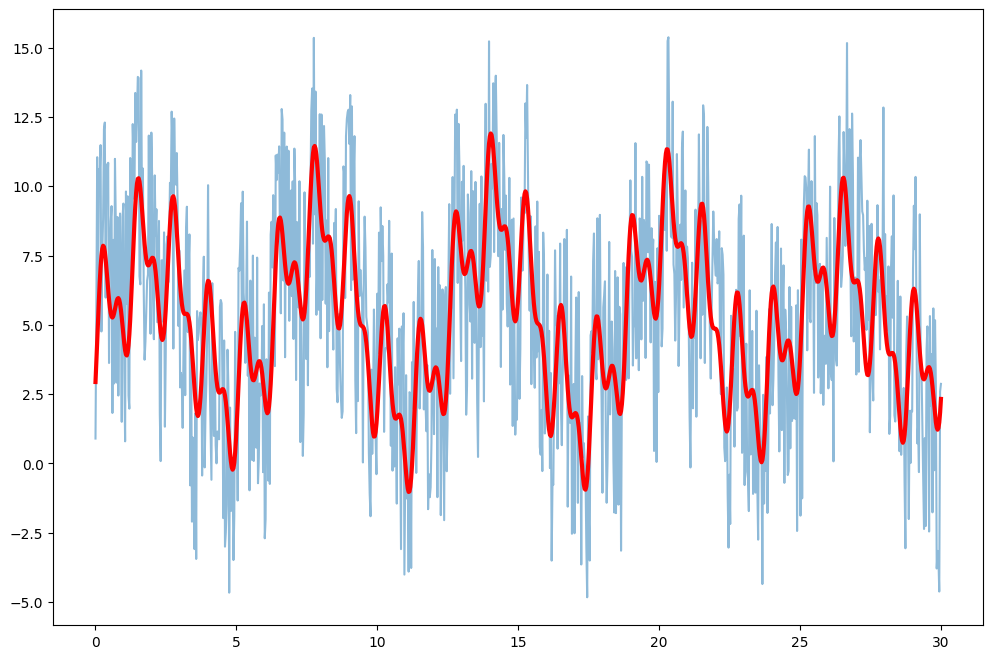

In [ ]:
x = np.linspace(0, 30, 1000)
y = 3 * np.sin(x) + 2 * np.sin(5 * x) + np.sin(10 * x) + np.random.random(x.shape[0]) * 10
plt.plot(x, y)
plt.show()
#Etape 1(transformation de fourier)
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)
plt.show()
#Etape2(boulean indexing(spectre nettoyé))
fourier[power<400] = 0
plt.plot(np.abs(frequences), np.abs(fourier))
#Etape3(Transformation de fourier inverse pour obtenir un graphique sans bruit)

### nd image (traitement d'image)

Scipy morphology

2 types d'op:
- Dilatation: imprime des pixels
- efface des pixels

In [1]:
from scipy import ndimage

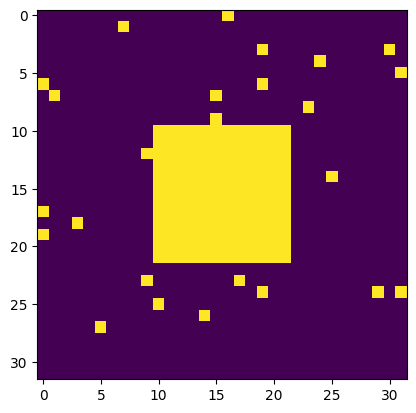

In [107]:
np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(X)

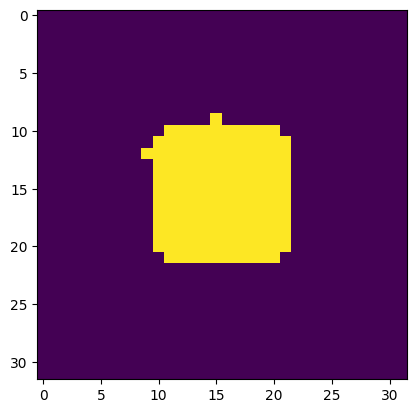

In [110]:
#supprime le bruit
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)